# 데이터시각화

# 1. seaborn 기초

In [ ]:
# seaborn이 설치가 안되어있다면 아래의 코드 중 하나로 설치
!conda install -y seaborn 
!pip install seaborn

In [1]:
# seaborn은 matplotlib과 함께 실행된다.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rc 

plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Malgun Gothic") 
get_ipython().run_line_magic("matplotlib", "inline")

## 예제1: seaborn 기본 형태

In [46]:
# 실습을 위한 데이터 생성
# np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x + 0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

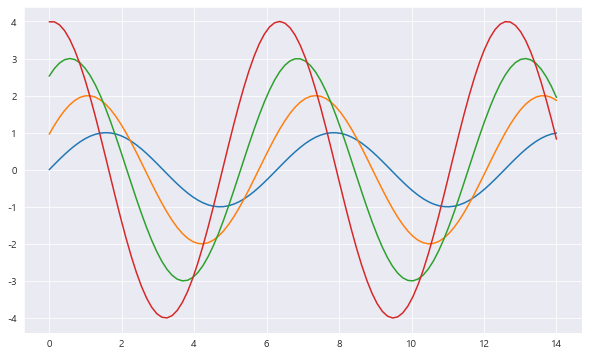

In [47]:
# 도화지를 깐다
plt.figure(figsize=(10, 6))

# 그림을 그린다
plt.plot(x, y1, x, y2, x, y3, x, y4)

# 시각화
plt.show()

- sns.set_style()

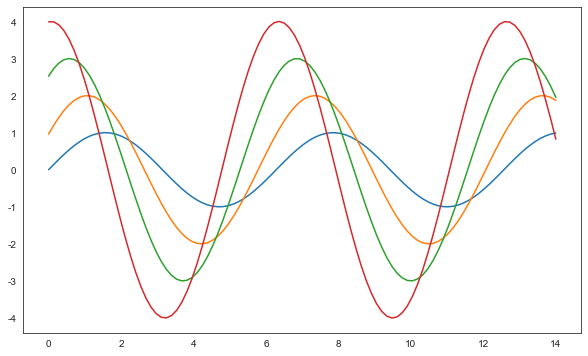

In [48]:
# sns.set_style()
# "white", "whitegrid", "dark", "darkgrid", "ticks"

sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4) 
plt.show()

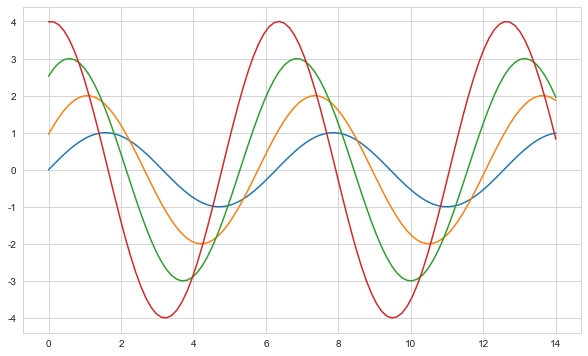

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

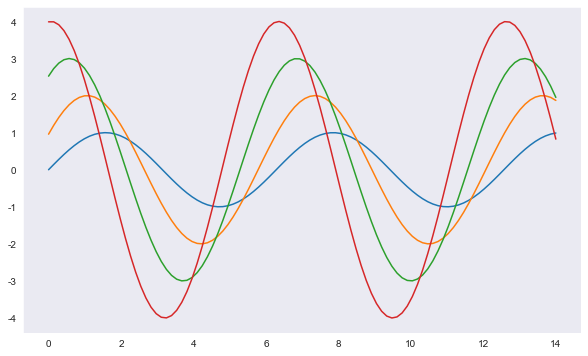

In [49]:
sns.set_style("dark")
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

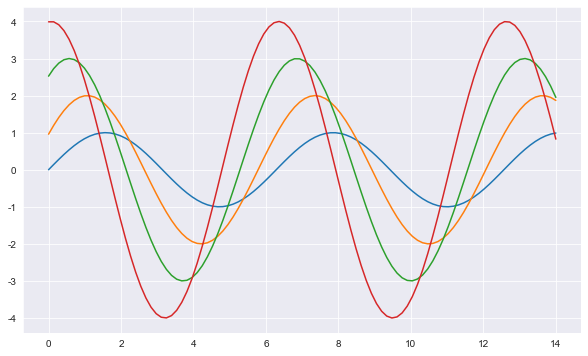

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

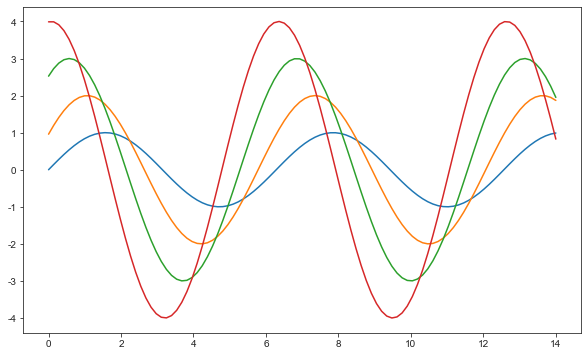

In [83]:
sns.set_style("ticks")
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

- sns.despine()

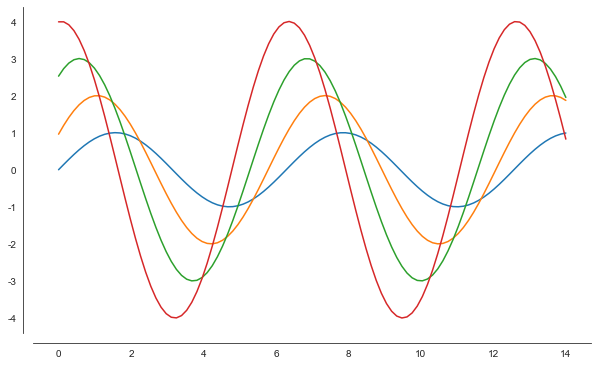

In [52]:
sns.set_style("white")
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine(offset=10) # 왼쪽, 아랫쪽 선만 남음 
plt.show()

---

## 예제2: seaborn tips data  

In [56]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
# Dtype == catagory : 범주형 데이터
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


- boxplot 

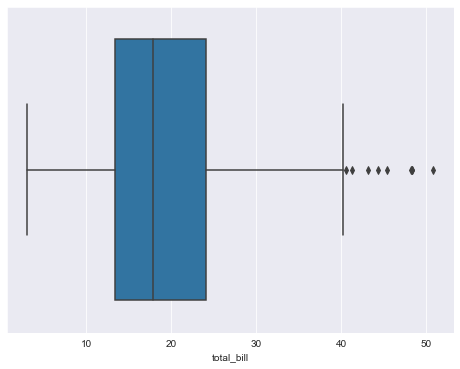

In [11]:
# boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x=tips["total_bill"])
plt.show()

In [58]:
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

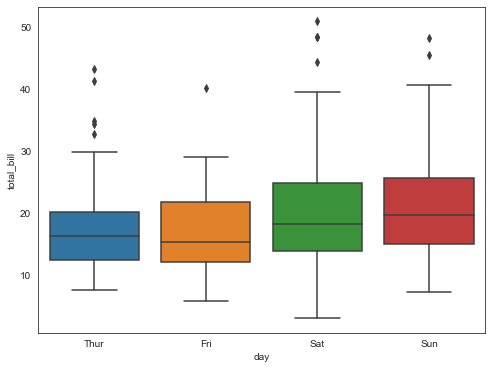

In [59]:
# boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

In [60]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


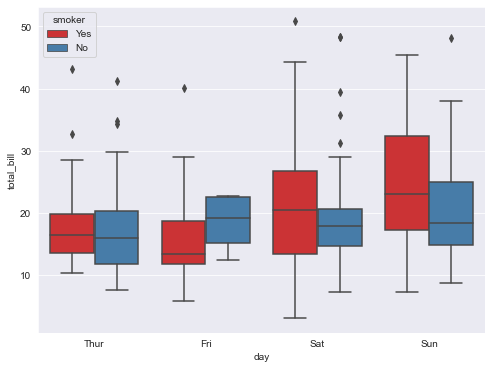

In [15]:
# boxplot hue, palette option 
# hue: 카테고리 데이터 표현 
# palette : 색상 표현 (Set1~Set2)

plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips, hue="smoker", palette="Set1") 
plt.show()

- swarmplot 

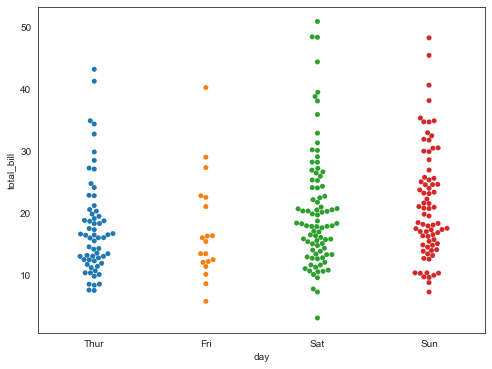

In [62]:
# swarplot 기본 형태
plt.figure(figsize=(8, 6))
sns.swarmplot(x="day", y="total_bill", data=tips) 
plt.show()

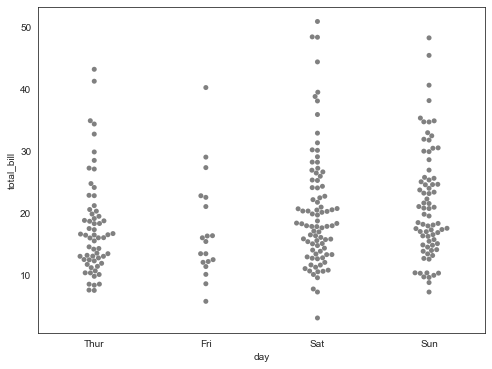

In [64]:
# color: 0~1 사이 검은색부터 흰색 사이 값을 조절 

plt.figure(figsize=(8, 6))
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.5") 
plt.show()

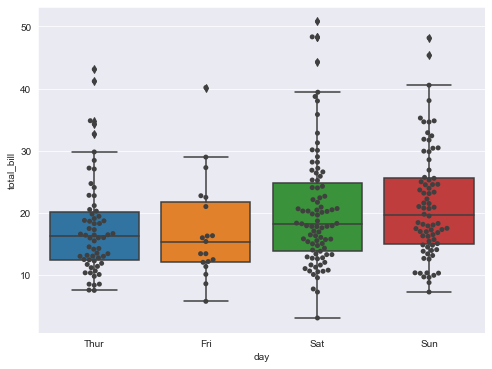

In [17]:
# boxplot with swarmplot 

plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.25")
plt.show()

- lmplot

In [68]:
# lmplot: total_bil과 tip 사이 관계 파악 
# float 데이터인 total_bill, tips 사용
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


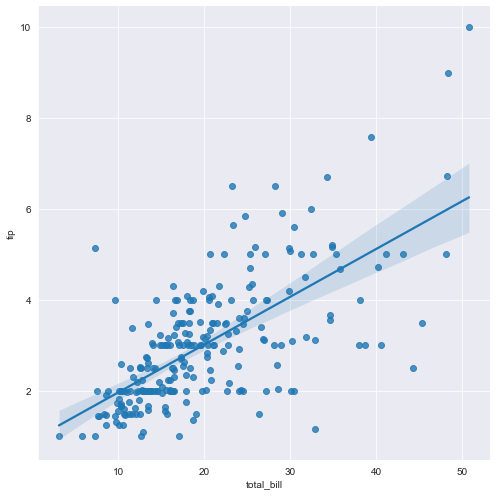

In [71]:
# 색칠된 데이터가 좁을수록 강한 상관관계

sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=7) 
plt.show()

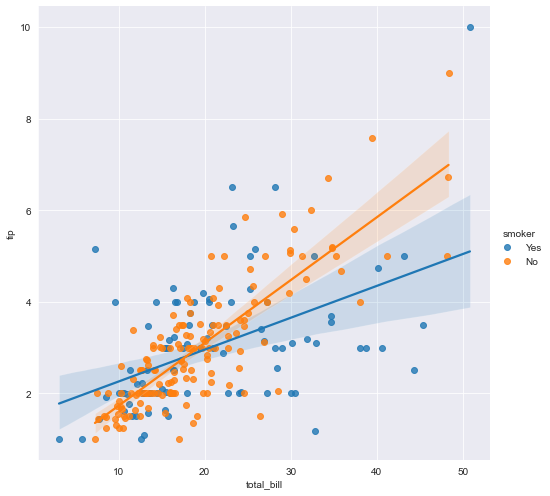

In [72]:
# hue option : 카테고리 데이터 표현

sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=7, hue="smoker")
plt.show()

---

## 예제3: flights data
- heatmap

In [73]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [74]:
# Dtype == catagory : 범주형 데이터
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [75]:
# pivot을 사용하여 데이터 정리
flights = flights.pivot(index="month", columns="year", values="passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


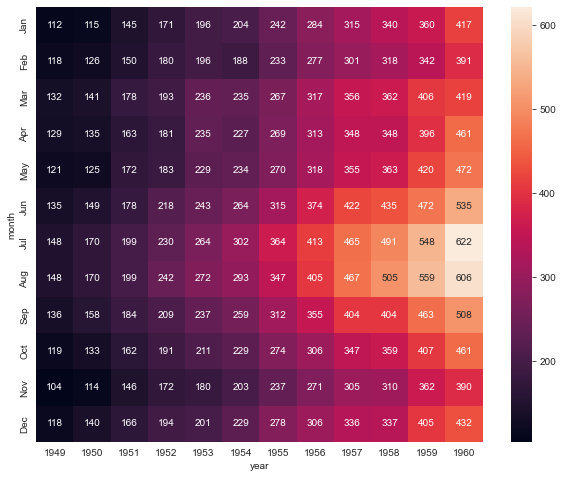

In [25]:
# heatmap 

plt.figure(figsize=(10, 8))
sns.heatmap(data=flights, annot=True, fmt="d") # annot=True 데이터 값 표시, fmt="d" 정수형 표현
plt.show()

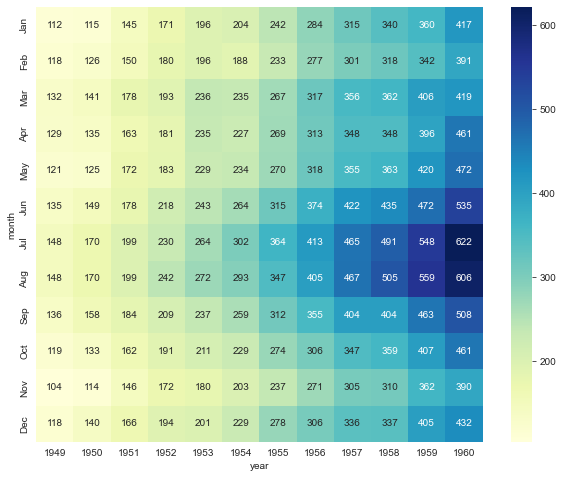

In [26]:
# colormap 옵션

plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

---

## 예제4: iris data 
- pairplot 

In [79]:
iris = sns.load_dataset("iris")
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


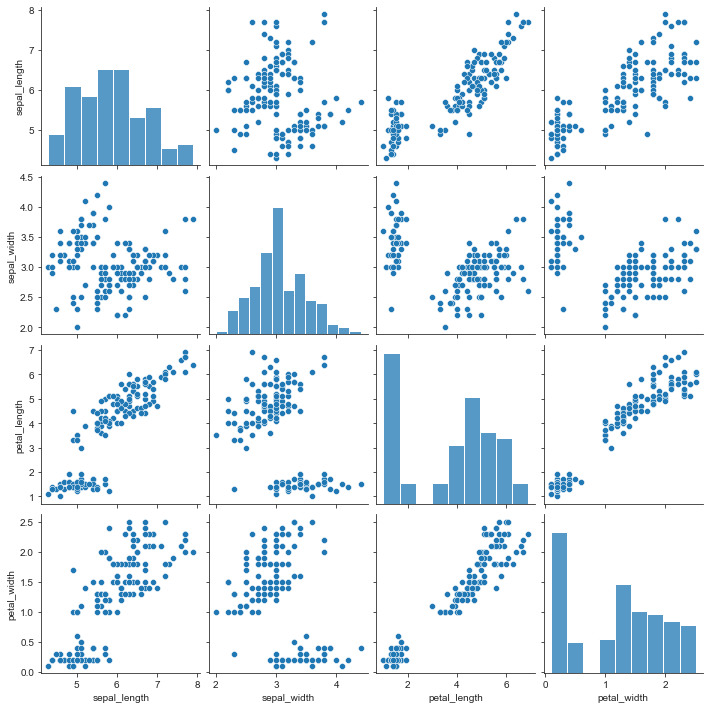

In [85]:
# pairplot 
sns.pairplot(iris)
plt.show()

In [29]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [30]:
# 3가지 카테고리
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

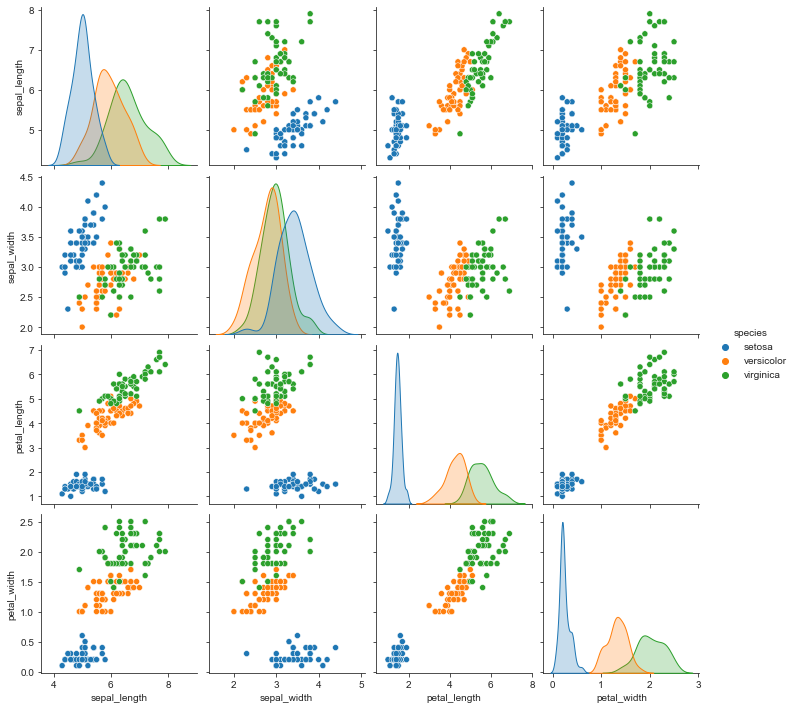

In [84]:
# set_style : white, whitegrid, dark, darkgrid, sticks
# hue : 카테고리 데이터 표현
sns.set_style("ticks")
sns.pairplot(iris, hue="species")
plt.show()

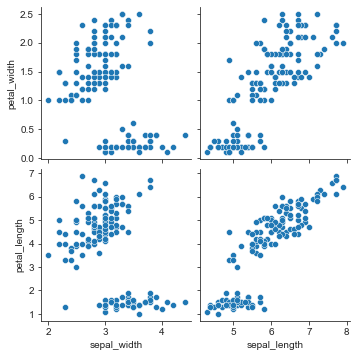

In [32]:
# 원하는 컬럼만 pairplot 
sns.pairplot(iris, 
             x_vars=["sepal_width", "sepal_length"], 
             y_vars=["petal_width", "petal_length"])
plt.show()

---

## 예제5: anscombe data 
- lmplot 

In [2]:
anscombe = sns.load_dataset("anscombe")
anscombe.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [87]:
# 4가지 카테고리
anscombe["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

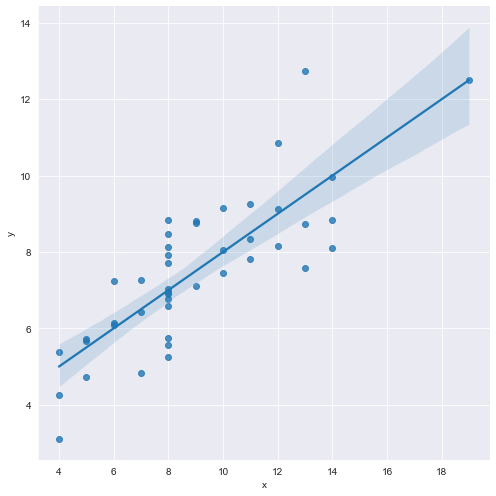

In [91]:
# lmplot
sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe, height=7)
plt.show()

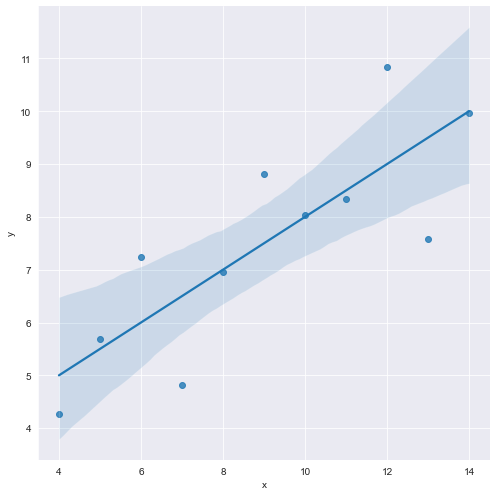

In [92]:
# query라는 매서드로 I에 해당하는 데이터셋만 가져옴
sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), height=7)
plt.show()

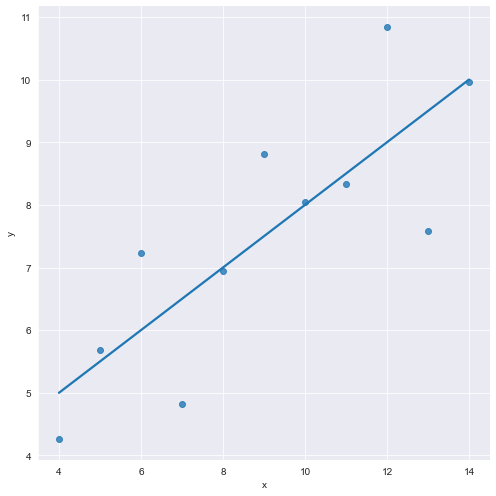

In [90]:
# ci 신뢰구간 선택, None 옵션은 신뢰구간 영역 보이는 옵션을 끄는 것
sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, height=7)
plt.show()

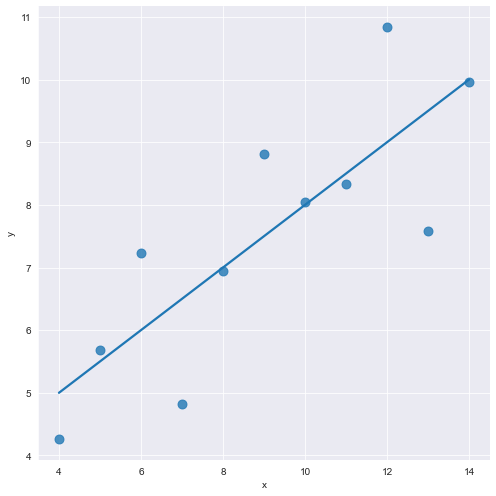

In [94]:
# scater_kws 마커사이즈 변경 

sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, height=7, scatter_kws={"s": 80}) 

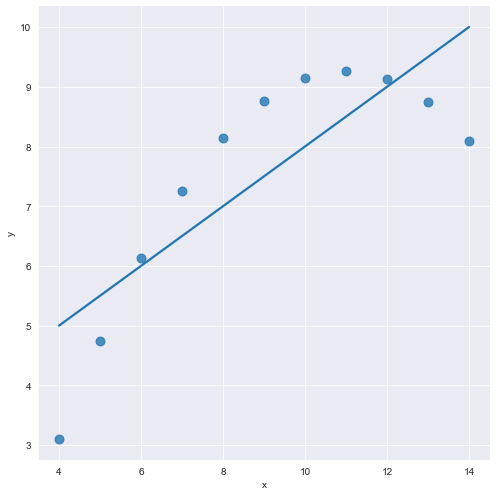

In [37]:
# order option : 차수에 따라 옵션 변경 
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'II'"), # 2차식
    order=1
    ci=None, 
    height=7, 
    scatter_kws={"s": 80})
plt.show()

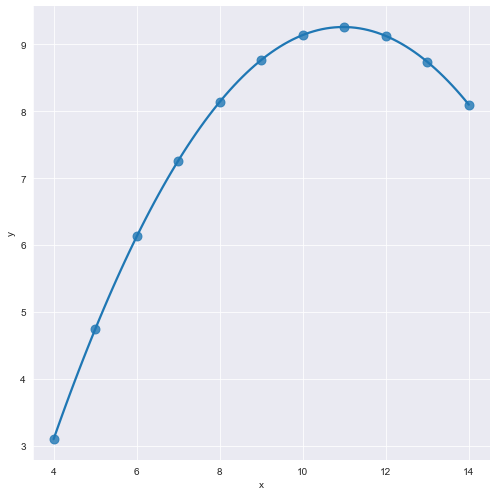

In [38]:
# order option : 차수에 따라 옵션 변경 
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'II'"), # 2차식
    order=2, # 차수에 따라 옵션 변경 
    ci=None, 
    height=7, 
    scatter_kws={"s": 80}) # ci 신뢰구간 선택 
plt.show()

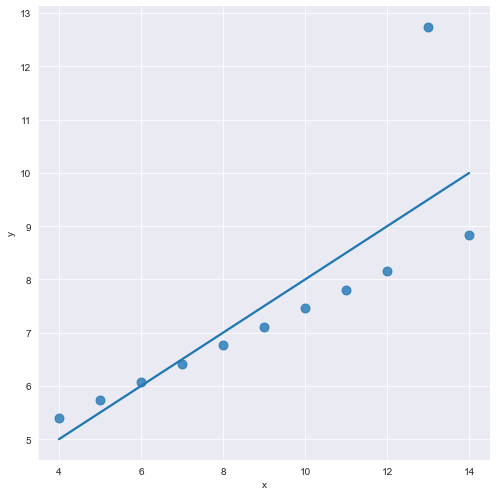

In [39]:
# robust : 원본에서 많이 떨어진 데이터(outlier)는 없는 셈 친다 
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'III'"),
    ci=None, 
    height=7, 
    scatter_kws={"s": 80})
plt.show()

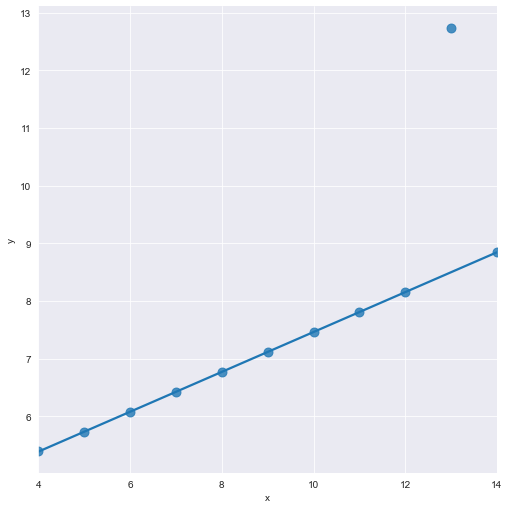

In [3]:
# robust : 원본에서 많이 떨어진 데이터(outlier)는 없는 셈 친다 
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'III'"),
    robust=True,
    ci=None, 
    height=7, 
    scatter_kws={"s": 80})
plt.show()